# Scales demand
#### keeps all existing routes but creates more cars for each route by making the endTime later

In [ ]:
import json

In [32]:
def Scaling(directory, new_directory, scaling_factor, select, range_scaling = None):
    
    # open the respective flow file
    with open(directory, "r") as jsonFile:
        flow_file = json.load(jsonFile)


    # set endTime further back to allow for more generated cars
    for i, flow in enumerate(flow_file):
        
        if i % select == 0:
            interval = flow["interval"]
            startTime = flow["startTime"]
            endTime = flow["endTime"]

            if range_scaling is not None:
                if startTime < range_scaling[0] or startTime > range_scaling[1]:
                    continue

            num_interval = (endTime - startTime + 1) // interval

            mod_interval = (endTime - startTime + 1) % interval != 0

            number_of_generated_cars = num_interval + mod_interval

            new_number_of_generated_cars = number_of_generated_cars * scaling_factor

            new_endTime = startTime + ((new_number_of_generated_cars - 1) * interval)

            flow["endTime"] = int(new_endTime)
        
        
    
    # Write the modified data back to the file
    with open(new_directory, "w") as jsonFile:
        json.dump(flow_file, jsonFile, indent=4)

    print("Done")
    
    
directory = "../Simulation_Results/man/flow.json"
new_directory = "../Simulation_Results/man/scaled_flow.json"

scaling_factor = 2

# only change every i-th vehicle flow
select = 4

# only scales vehicle flows that start within this interval
range_scaling = None# (500, 1500) # if None, scales everything

Scaling(directory, new_directory, scaling_factor, select, range_scaling)

Done


# Check distribution of flow file

In [1]:
import json

In [3]:
flow_file = "../Simulation_Results/Manhattan/backup/flow.json"
new_flow_file = "../Simulation_Results/Manhattan/flow.json"

with open(flow_file, "r") as jsonFile:
    flow_file = json.load(jsonFile)
    
with open(new_flow_file, "r") as jsonFile:
    new_flow_file = json.load(jsonFile)

In [13]:
def analyze(flow_data):

    vehicles = []

    for flow in flow_data:

        startTime = flow["startTime"]
        endTime = flow["endTime"]
        interval = flow["interval"]
        

        num_interval = (endTime - startTime + 1) // interval

        mod_interval = (endTime - startTime + 1) % interval != 0

        number_of_generated_cars = int(num_interval + mod_interval)   
        
        old_length = len(vehicles)

        for car_start in range(number_of_generated_cars):
            vehicles.append(int(startTime + interval * car_start))
            

    print(f"Last Start Time is {max(vehicles)}")
    
    return vehicles


flow_vehicles = analyze(flow_file)
scaled_flow_vehicles = analyze(new_flow_file)

Last Start Time is 3875
Last Start Time is 3875


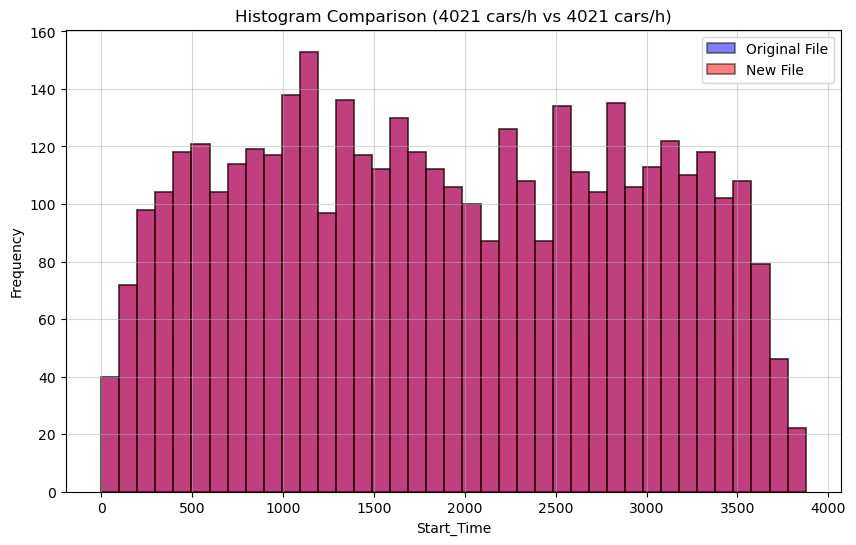

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def histogram(flow_vehicles, scaled_flow_vehicles):
    # Define the bucket size
    bucket_size = 100

    # Calculate the number of bins based on the bucket size
    num_bins = int((max(max(flow_vehicles), max(scaled_flow_vehicles)) + bucket_size) / bucket_size)

    # calculate number of vehicles per hour
    vehicles_per_hour = len(np.array(flow_vehicles)[np.array(flow_vehicles) < 3600])
    scaled_vehicles_per_hour = len(np.array(scaled_flow_vehicles)[np.array(scaled_flow_vehicles) < 3600])
    
    # Create figure and subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting histograms for Start_Time
    ax.hist(flow_vehicles, bins=num_bins, alpha=0.5, color='blue', label='Original File', edgecolor='black', linewidth=1.2)
    ax.hist(scaled_flow_vehicles, bins=num_bins, alpha=0.5, color='red', label='New File', edgecolor='black', linewidth=1.2)
    
    ax.set_xlabel('Start_Time')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram Comparison ({vehicles_per_hour} cars/h vs {scaled_vehicles_per_hour} cars/h)')
    ax.grid(alpha=0.5)
    
    # Add a legend
    ax.legend()

    # Display the plot
    plt.show()
    
    
histogram(flow_vehicles, scaled_flow_vehicles)